## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
startup_data = pd.read_csv('startup_funding.csv')
startup_data.head(10)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
5,6,13/01/2020,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,"90,00,000",NaN
6,7,10/01/2020,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,"15,00,00,000",NaN
7,8,12/12/2019,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,"60,00,000",NaN
8,9,06/12/2019,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,"7,00,00,000",NaN
9,10,03/12/2019,Dhruva Space,Aerospace,Satellite Communication,Bengaluru,"Mumbai Angels, Ravikanth Reddy",Seed,"5,00,00,000",NaN


In [ ]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [ ]:
# Convert the 'Date dd/mm/yyyy' column to datetime format
startup_data['Date dd/mm/yyyy'] = pd.to_datetime(startup_data['Date dd/mm/yyyy'], format='%d/%m/%Y', errors='coerce')
startup_data['Date dd/mm/yyyy']

,Date dd/mm/yyyy
0,2020-01-09
1,2020-01-13
2,2020-01-09
3,2020-01-02
4,2020-01-02
...,...
3039,2015-01-29
3040,2015-01-29
3041,2015-01-30
3042,2015-01-30


In [ ]:
# Convert 'Amount in USD' to numeric, removing any commas and non-numeric values
startup_data['Amount in USD'] = startup_data['Amount in USD'].replace({',': ''}, regex=True)
startup_data['Amount in USD']

,Amount in USD
0,200000000
1,8048394
2,18358860
3,3000000
4,1800000
...,...
3039,4500000
3040,825000
3041,1500000
3042,NaN


In [ ]:
missing_values = startup_data.isnull().sum()
missing_values


,0
Sr No,0
Date dd/mm/yyyy,8
Startup Name,0
Industry Vertical,171
SubVertical,936
City Location,180
Investors Name,24
InvestmentnType,4
Amount in USD,960
Remarks,2625


In [ ]:
# Handle missing values
startup_data = startup_data.dropna(subset=['Date dd/mm/yyyy'])  # Drop rows with missing dates
fill_columns = ['Industry Vertical', 'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType']
startup_data[fill_columns] = startup_data[fill_columns].fillna('Unknown')
startup_data['Amount in USD'].fillna(0, inplace=True)


<ipython-input-55-fc3efdb674bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  startup_data[fill_columns] = startup_data[fill_columns].fillna('Unknown')
<ipython-input-55-fc3efdb674bb>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  startup_data['Amount in USD'].fillna(0, inplace=True

In [ ]:
# Drop 'Remarks' column
if 'Remarks' in startup_data.columns:
    startup_data.drop(columns=['Remarks'], inplace=True)


<ipython-input-56-d1e6cf2507c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  startup_data.drop(columns=['Remarks'], inplace=True)


In [ ]:
startup_data['Amount in USD'] = pd.to_numeric(startup_data['Amount in USD'], errors='coerce')

# Drop rows with NaN values resulting from non-numeric conversion
startup_data = startup_data.dropna(subset=['Amount in USD'])

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = startup_data['Amount in USD'].quantile(0.25)  # 25th percentile
Q3 = startup_data['Amount in USD'].quantile(0.75)  # 75th percentile

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to include only values within the calculated bounds
startup_data = startup_data[
    (startup_data['Amount in USD'] >= lower_bound) &
    (startup_data['Amount in USD'] <= upper_bound)
]


<ipython-input-57-d6b6b9424d7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  startup_data['Amount in USD'] = pd.to_numeric(startup_data['Amount in USD'], errors='coerce')


In [ ]:
# Extract 'Year' and 'Month' from the date for trend analysis
startup_data['Year'] = startup_data['Date dd/mm/yyyy'].dt.year
startup_data['Month'] = startup_data['Date dd/mm/yyyy'].dt.month


In [ ]:
# Standardize city and industry names
startup_data['City  Location'] = startup_data['City  Location'].str.strip().str.title()
startup_data['Industry Vertical'] = startup_data['Industry Vertical'].str.strip().str.title()
startup_data['City  Location'] = startup_data['City  Location'].replace({'Bengaluru': 'Bangalore'})


In [ ]:
# ---- Section 3: Exploratory Data Analysis ---- #
# Insights: Yearly Funding Trends
yearly_funding = startup_data.groupby('Year').agg({'Amount in USD': 'sum', 'Startup Name': 'count'}).reset_index()
yearly_funding.columns = ['Year', 'Total Funding (USD)', 'Number of Deals']



In [ ]:
# Insights: Top Cities and Industries by Funding
city_funding = startup_data.groupby('City  Location').agg({'Amount in USD': 'sum', 'Startup Name': 'nunique'}).reset_index()
city_funding.columns = ['City', 'Total Funding (USD)', 'Number of Startups']



In [ ]:
industry_funding = startup_data.groupby('Industry Vertical').agg({'Amount in USD': 'sum', 'Startup Name': 'nunique'}).reset_index()
industry_funding.columns = ['Industry', 'Total Funding (USD)', 'Number of Startups']

top_cities = city_funding.sort_values(by='Total Funding (USD)', ascending=False).head(10)
top_industries = industry_funding.sort_values(by='Total Funding (USD)', ascending=False).head(10)

top_cities
top_industries

,Industry,Total Funding (USD),Number of Startups
90,Consumer Internet,9.294142e+08,764
636,Technology,5.871279e+08,411
148,Ecommerce,3.357106e+08,199
650,Unknown,1.787114e+08,136
199,Finance,1.174380e+08,36
247,Healthcare,8.591800e+07,60
327,Logistics,5.894500e+07,24
143,E-Commerce,5.688422e+07,22
164,Education,5.114300e+07,22
210,Food & Beverage,3.113600e+07,21


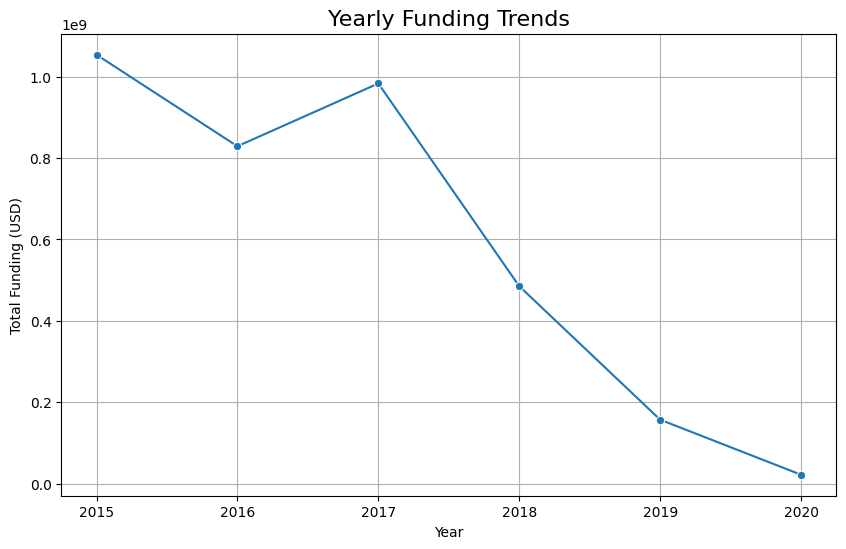

In [ ]:
# Visualizations: Funding Trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_funding, x='Year', y='Total Funding (USD)', marker='o')
plt.title('Yearly Funding Trends', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Funding (USD)')
plt.grid()
plt.show()


In [ ]:
# Additional insights: Investment Type Analysis
investment_type_funding = startup_data.groupby('InvestmentnType').agg({'Amount in USD': 'sum', 'Startup Name': 'nunique'}).reset_index()
investment_type_funding.columns = ['Investment Type', 'Total Funding (USD)', 'Number of Startups']
top_investment_types = investment_type_funding.sort_values(by='Total Funding (USD)', ascending=False).head(5)

investment_type_funding.sort_values(by='Total Funding (USD)', ascending=False), yearly_funding.tail(), top_cities, top_industries

(                Investment Type  Total Funding (USD)  Number of Startups
 15               Private Equity         2.784028e+09                 858
 21                 Seed Funding         3.446483e+08                1259
 6                  Debt Funding         9.210909e+07                  22
 28                     Series A         6.920000e+07                  17
 25          Seed/ Angel Funding         5.582681e+07                  58
 19         Seed / Angel Funding         3.569317e+07                  46
 29                     Series B         1.842738e+07                   6
 31                     Series C         1.463839e+07                   2
 27               Seed\\nFunding         1.000760e+07                  30
 26           Seed/Angel Funding         9.530230e+06                  23
 34              Structured Debt         8.600000e+06                   1
 13                 Pre-Series A         7.872000e+06                   4
 36                      Unknown      

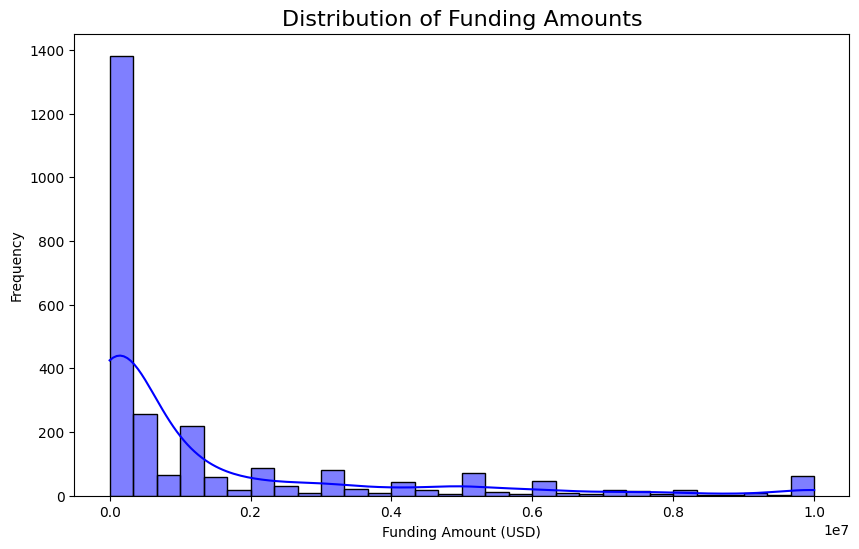

In [ ]:
# 1. Distribution of Funding Amounts
plt.figure(figsize=(10, 6))
sns.histplot(startup_data['Amount in USD'], bins=30, kde=True, color='blue')
plt.title('Distribution of Funding Amounts', fontsize=16)
plt.xlabel('Funding Amount (USD)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-66-68391fe89122>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=startup_data['InvestmentnType'], order=startup_data['InvestmentnType'].value_counts().index, palette='mako')


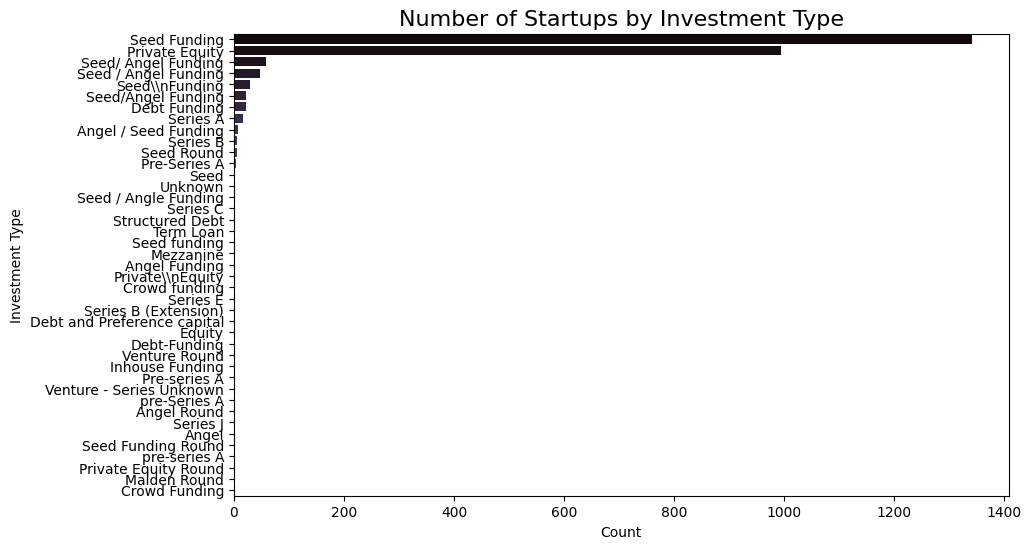

In [ ]:
# 2. Count of Startups by Investment Type
plt.figure(figsize=(10, 6))
sns.countplot(y=startup_data['InvestmentnType'], order=startup_data['InvestmentnType'].value_counts().index, palette='mako')
plt.title('Number of Startups by Investment Type', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Investment Type')
plt.show()

<ipython-input-67-f642cdb6ce05>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_count.values, y=industry_count.index, palette='viridis')


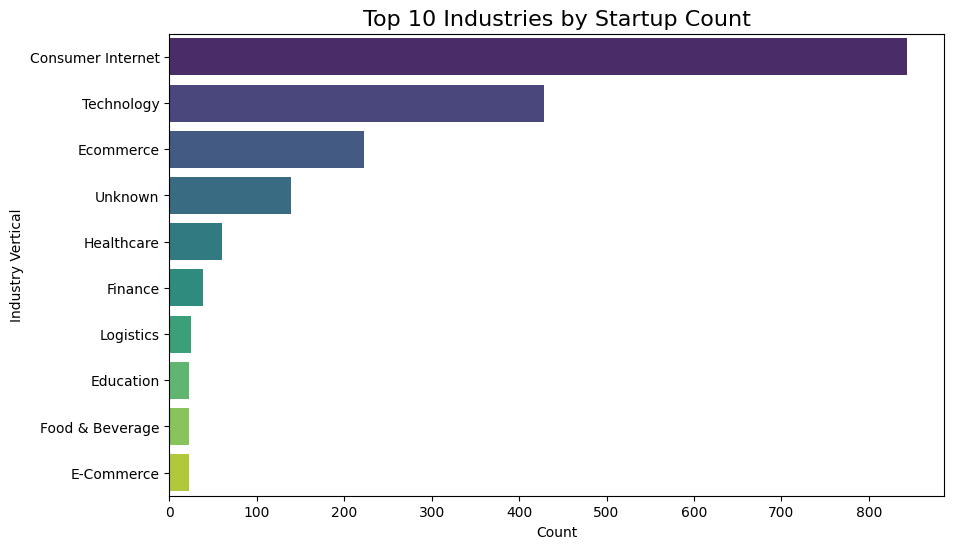

In [ ]:
# 3. Most Common Industries
plt.figure(figsize=(10, 6))
industry_count = startup_data['Industry Vertical'].value_counts().head(10)
sns.barplot(x=industry_count.values, y=industry_count.index, palette='viridis')
plt.title('Top 10 Industries by Startup Count', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Industry Vertical')
plt.show()

<ipython-input-68-ccd12ec241b1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='City  Location', y='Amount in USD', palette='coolwarm')


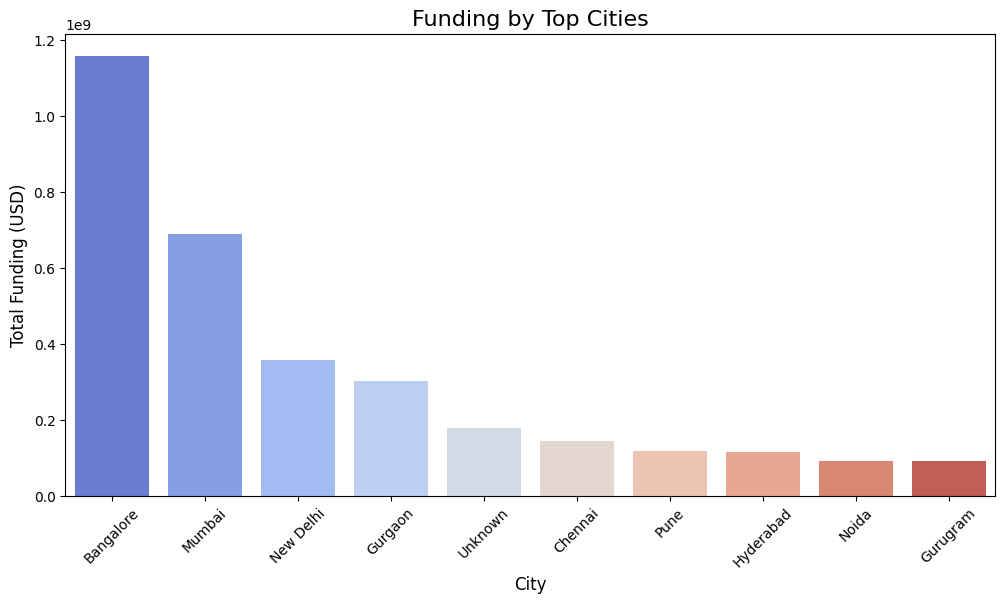

In [ ]:
# 1. Funding by City
# Ensure 'top_cities' is a DataFrame containing the aggregated data for cities
top_cities = startup_data.groupby('City  Location', as_index=False)['Amount in USD'].sum().sort_values(by='Amount in USD', ascending=False).head(10)

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x='City  Location', y='Amount in USD', palette='coolwarm')
plt.title('Funding by Top Cities', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Funding (USD)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()


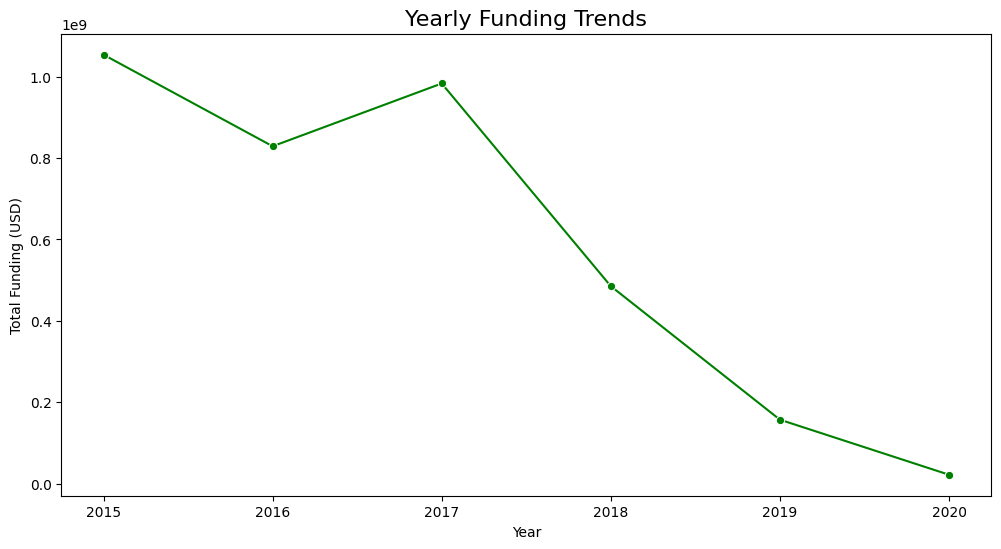

In [ ]:
# 2. Funding Amount by Year
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_funding, x='Year', y='Total Funding (USD)', marker='o', color='green')
plt.title('Yearly Funding Trends', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Funding (USD)')
plt.show()

In [ ]:
# 1. Funding by City and Industry
city_industry_funding = startup_data.groupby(['City  Location', 'Industry Vertical'])['Amount in USD'].mean().unstack().fillna(0)

top_cities = city_industry_funding.sum(axis=1).nlargest(5).index
top_industries = city_industry_funding.sum().nlargest(10).index

city_industry_funding_top = city_industry_funding.loc[top_cities, top_industries]
city_industry_funding_top

Industry Vertical,Finance,Ecommerce,E-Commerce,Consumer Internet,Technology,Logistics,Transportation,Online Education Platform,Fintech,Education
City Location,,,,,,,,,,
Bangalore,3.125000e+06,2.325252e+06,2.980833e+06,1.178843e+06,1.593556e+06,3.116667e+06,0.0,5000000.0,3500000.0,2.667500e+06
Mumbai,1.366667e+06,1.274541e+06,2.026832e+06,1.286149e+06,1.575610e+06,1.949375e+06,0.0,10000000.0,3300000.0,4.640833e+06
New Delhi,2.190000e+06,8.501321e+05,0.000000e+00,8.307664e+05,4.376023e+05,1.550000e+06,0.0,0.0,3000000.0,1.916667e+06
Gurgaon,4.489000e+06,1.638400e+06,2.561488e+06,1.197824e+06,5.619464e+05,2.750000e+06,8048394.0,0.0,0.0,2.250000e+06
Chennai,3.530000e+06,9.624000e+05,1.000000e+07,1.595667e+06,1.940609e+06,9.000000e+06,0.0,0.0,0.0,0.000000e+00


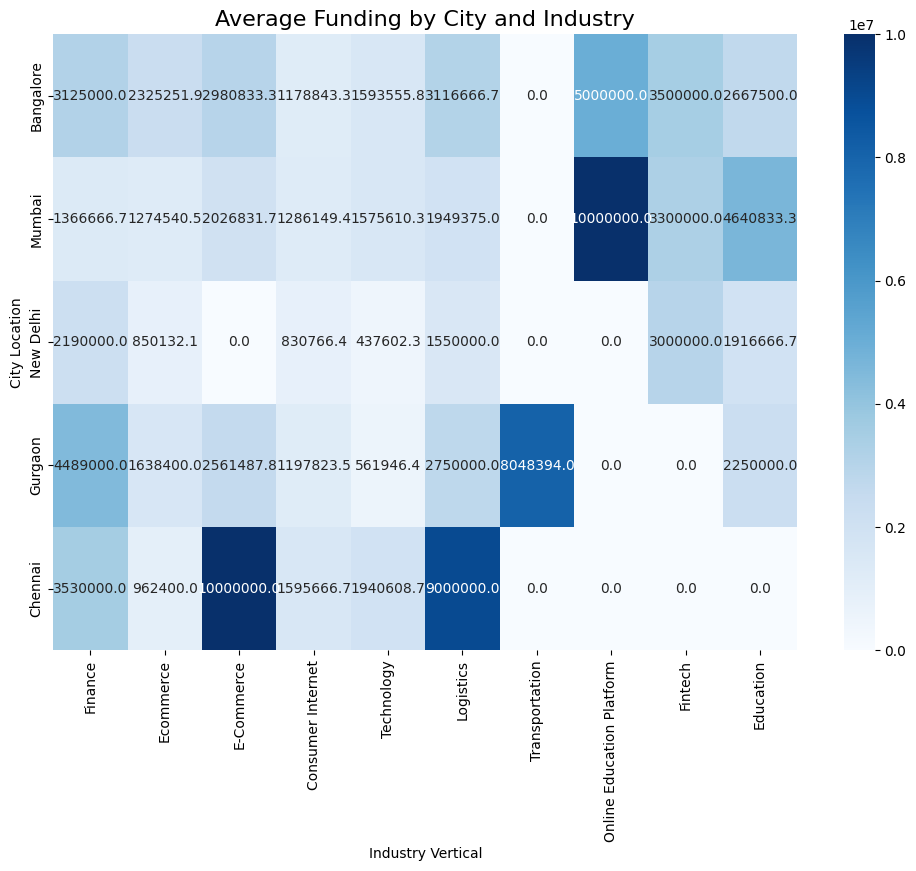

In [ ]:

# Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(city_industry_funding_top, annot=True, fmt=".1f", cmap='Blues')
plt.title('Average Funding by City and Industry', fontsize=16)
plt.xlabel('Industry Vertical')
plt.ylabel('City Location')
plt.show()

<Figure size 1200x800 with 0 Axes>

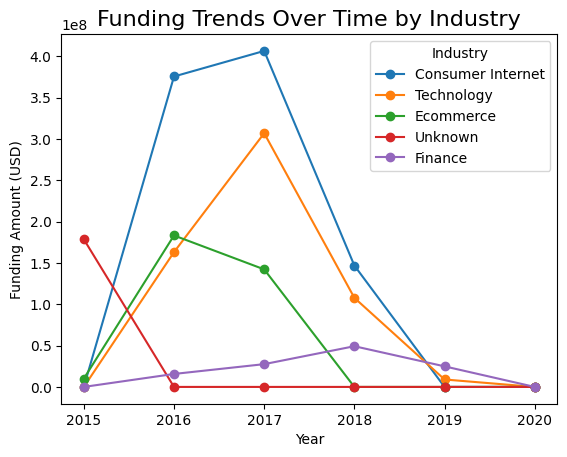

In [ ]:
# 2. Funding Amount Over Time by Industry
industry_year_trends = startup_data.groupby(['Year', 'Industry Vertical'])['Amount in USD'].sum().unstack().fillna(0)
top_industries = industry_year_trends.sum().nlargest(5).index

plt.figure(figsize=(12, 8))
industry_year_trends[top_industries].plot(kind='line', marker='o')
plt.title('Funding Trends Over Time by Industry', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Funding Amount (USD)')
plt.legend(title='Industry')
plt.show()

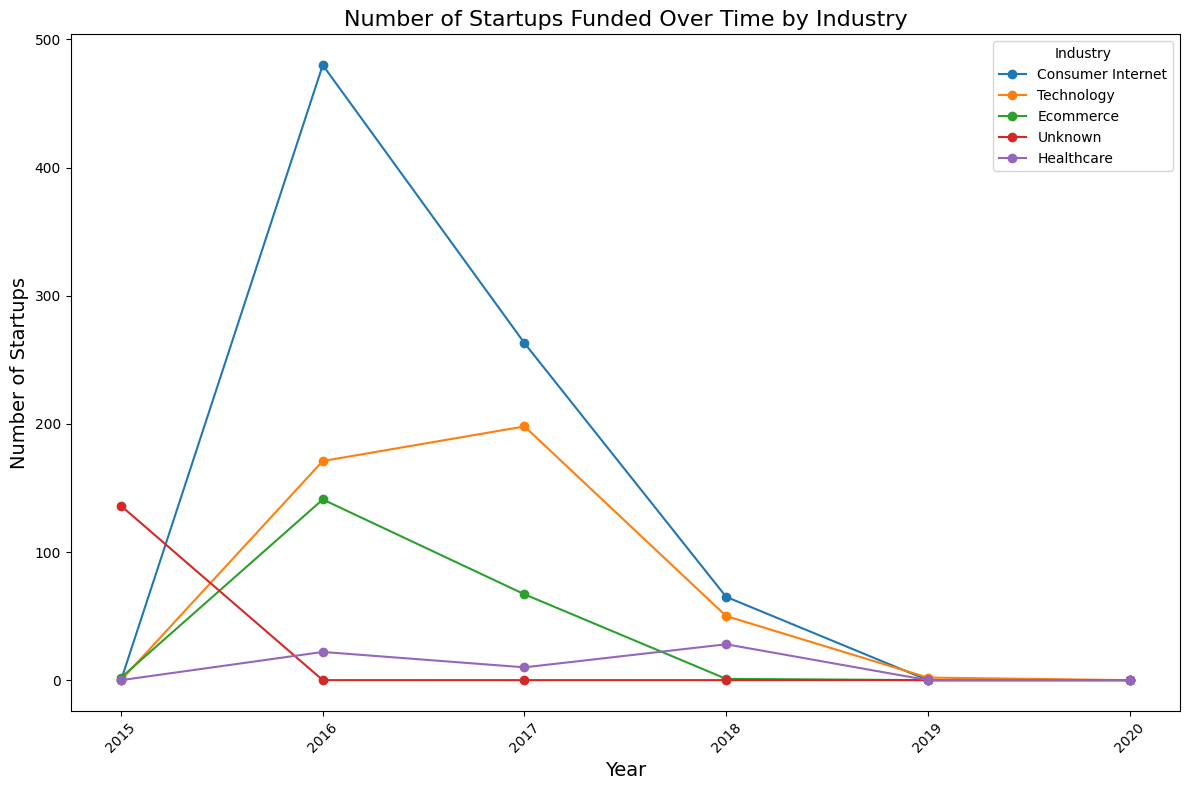

In [ ]:
# Grouping data by Industry and Year, and counting the number of startups
industry_year_startups = startup_data.groupby(['Industry Vertical', 'Year'])['Startup Name'].nunique().unstack().fillna(0)

# Selecting top 5 industries for visualization
top_industries_startups = industry_year_startups.sum(axis=1).nlargest(5).index
industry_year_startups_top = industry_year_startups.loc[top_industries_startups]

# Plotting line plot
industry_year_startups_top.T.plot(kind='line', figsize=(12, 8), marker='o')
plt.title('Number of Startups Funded Over Time by Industry', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Startups', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Industry')
plt.tight_layout()
plt.show()

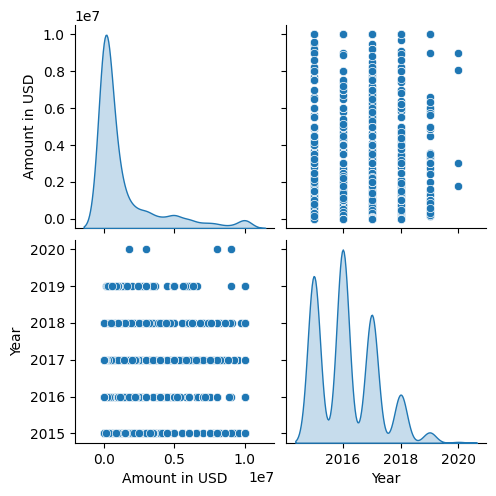

In [ ]:
# 3. Pairplot for Continuous Variables
sns.pairplot(startup_data[['Amount in USD', 'Year']], diag_kind='kde', kind='scatter')
plt.show()

In [ ]:
import networkx as nx

<ipython-input-76-5a8a781bc18c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=co_investor_df, x='Count', y='Investor 1', palette='coolwarm')


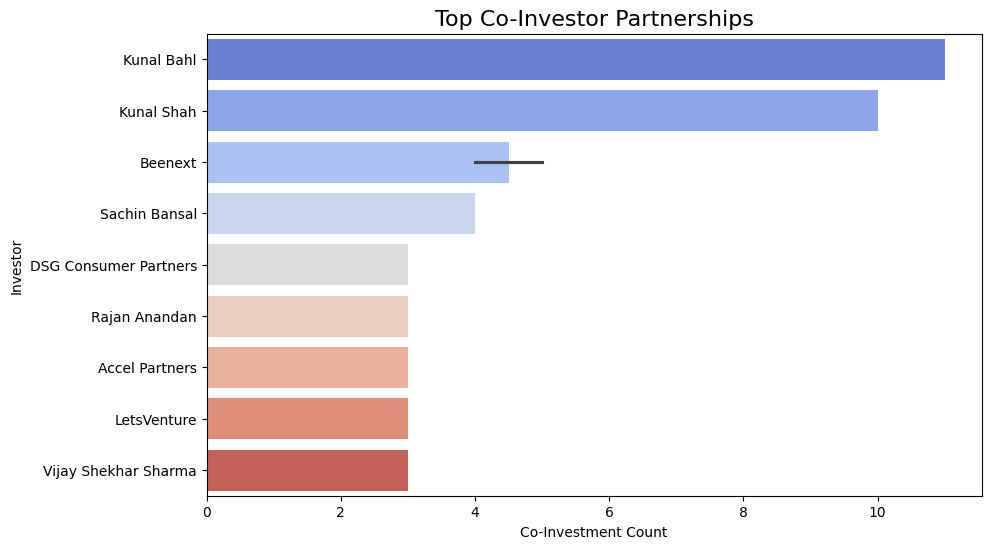

In [ ]:
# Splitting co-investors
from itertools import combinations
from collections import Counter

# Clean and split investor names
investor_pairs = startup_data['Investors Name'].dropna().str.split(',').apply(lambda x: [i.strip() for i in x])

# Generate all combinations of co-investors
co_investor_combinations = [combinations(pair, 2) for pair in investor_pairs if len(pair) > 1]

# Flatten the list and count combinations
flat_combinations = [pair for sublist in co_investor_combinations for pair in sublist]
co_investor_counts = Counter(flat_combinations).most_common(10)

# Convert to DataFrame for visualization
co_investor_df = pd.DataFrame(co_investor_counts, columns=['Investor Pair', 'Count'])
co_investor_df[['Investor 1', 'Investor 2']] = pd.DataFrame(co_investor_df['Investor Pair'].tolist(), index=co_investor_df.index)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=co_investor_df, x='Count', y='Investor 1', palette='coolwarm')
plt.title('Top Co-Investor Partnerships', fontsize=16)
plt.xlabel('Co-Investment Count')
plt.ylabel('Investor')
plt.show()


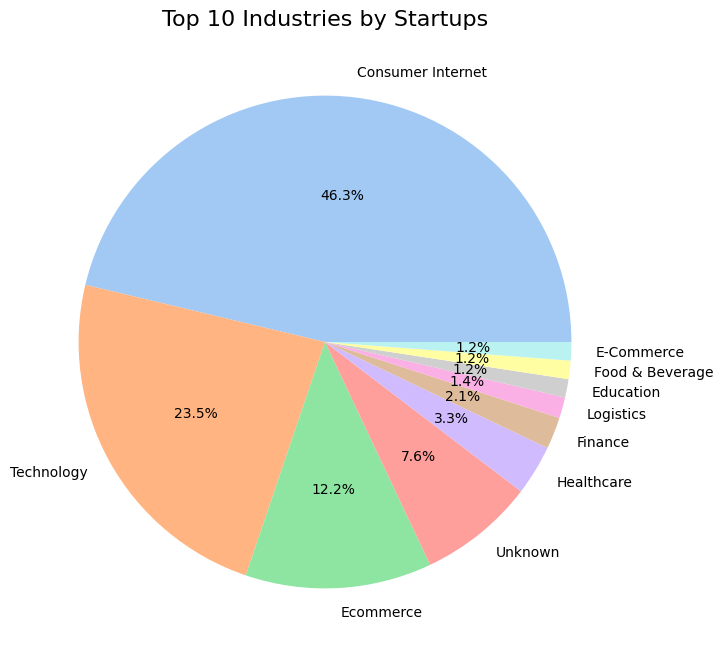

In [ ]:
# Pie chart for industry distribution
plt.figure(figsize=(8,8))
industry_distribution = startup_data['Industry Vertical'].value_counts().head(10)
plt.pie(industry_distribution, labels=industry_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Top 10 Industries by Startups', fontsize=16)
plt.show()


<ipython-input-78-9e3132f89c6f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_funding_by_city.index, y=avg_funding_by_city.values, palette='coolwarm')


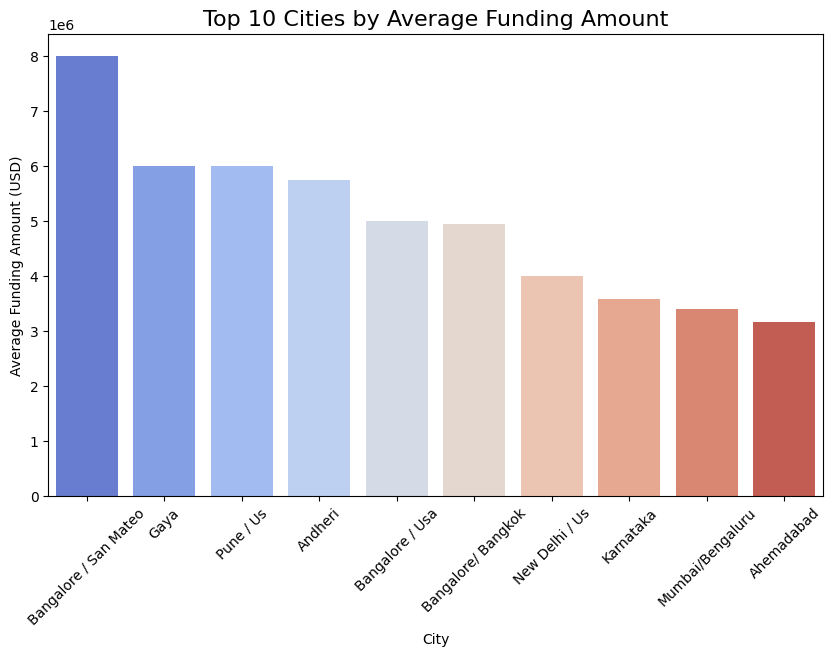

In [ ]:
# Bar plot for average funding amount by city
plt.figure(figsize=(10,6))
avg_funding_by_city = startup_data.groupby('City  Location')['Amount in USD'].mean().nlargest(10)
sns.barplot(x=avg_funding_by_city.index, y=avg_funding_by_city.values, palette='coolwarm')
plt.title('Top 10 Cities by Average Funding Amount', fontsize=16)
plt.xlabel('City')
plt.ylabel('Average Funding Amount (USD)')
plt.xticks(rotation=45)
plt.show()


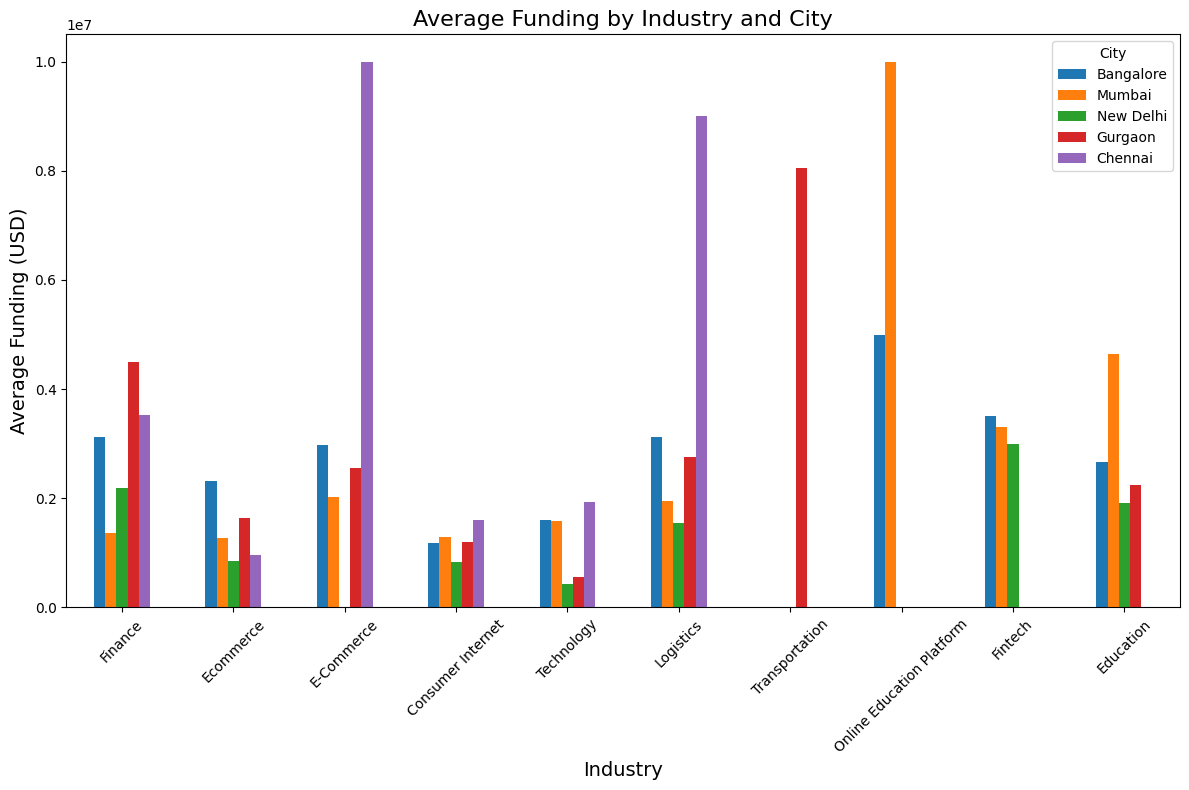

In [ ]:
# Grouping data by Industry and City, and calculating average funding
industry_city_funding = startup_data.groupby(['Industry Vertical', 'City  Location'])['Amount in USD'].mean().unstack().fillna(0)

# Selecting top 10 industries and cities for visualization
top_industries = industry_city_funding.sum(axis=1).nlargest(10).index
top_cities = industry_city_funding.sum().nlargest(5).index

industry_city_funding_top = industry_city_funding.loc[top_industries, top_cities]

# Plotting grouped bar plot
industry_city_funding_top.plot(kind='bar', figsize=(12, 8))
plt.title('Average Funding by Industry and City', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Average Funding (USD)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='City')
plt.tight_layout()
plt.show()



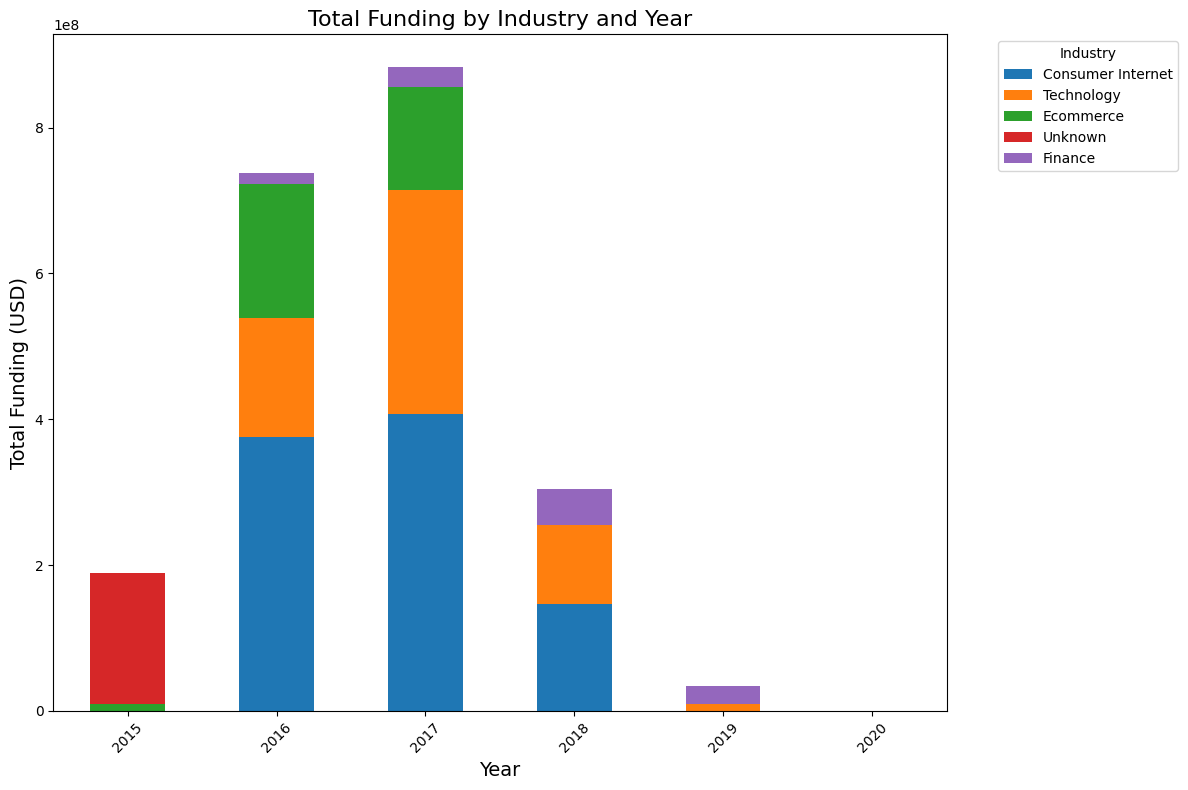

In [ ]:
# Grouping data by Year and Industry, and calculating total funding
industry_year_funding = startup_data.groupby(['Year', 'Industry Vertical'])['Amount in USD'].sum().unstack().fillna(0)

# Selecting top 5 industries for better visualization
top_industries_funding = industry_year_funding.sum().nlargest(5).index
industry_year_funding_top = industry_year_funding[top_industries_funding]

# Plotting stacked bar plot
industry_year_funding_top.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total Funding by Industry and Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Funding (USD)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
